In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

Found 2 CSV files

📊 Processing: corpus_all


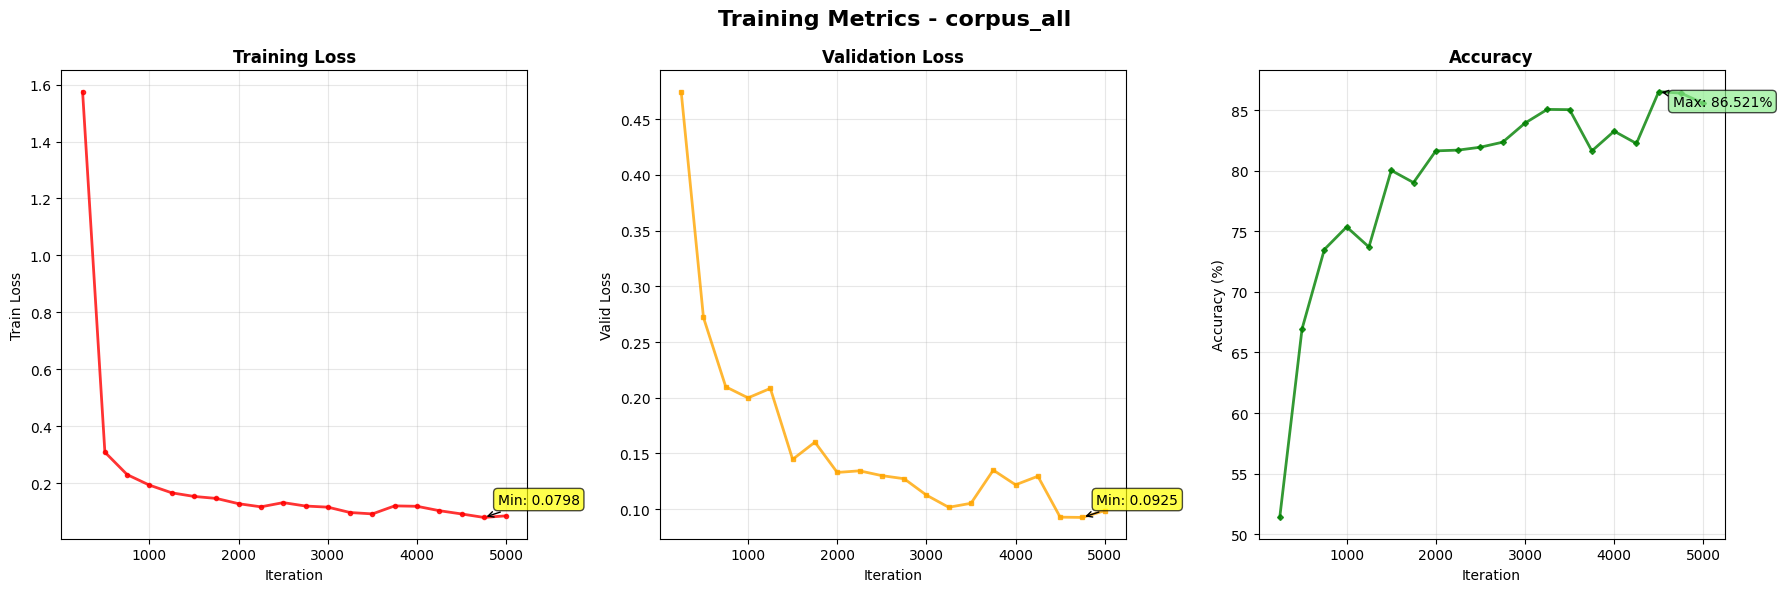

  Data points: 20
  Train Loss: 1.5753 → 0.0854
  Valid Loss: 0.4748 → 0.0986
  Accuracy: 51.389% → 85.554%

📊 Processing: corpus_oryor_po


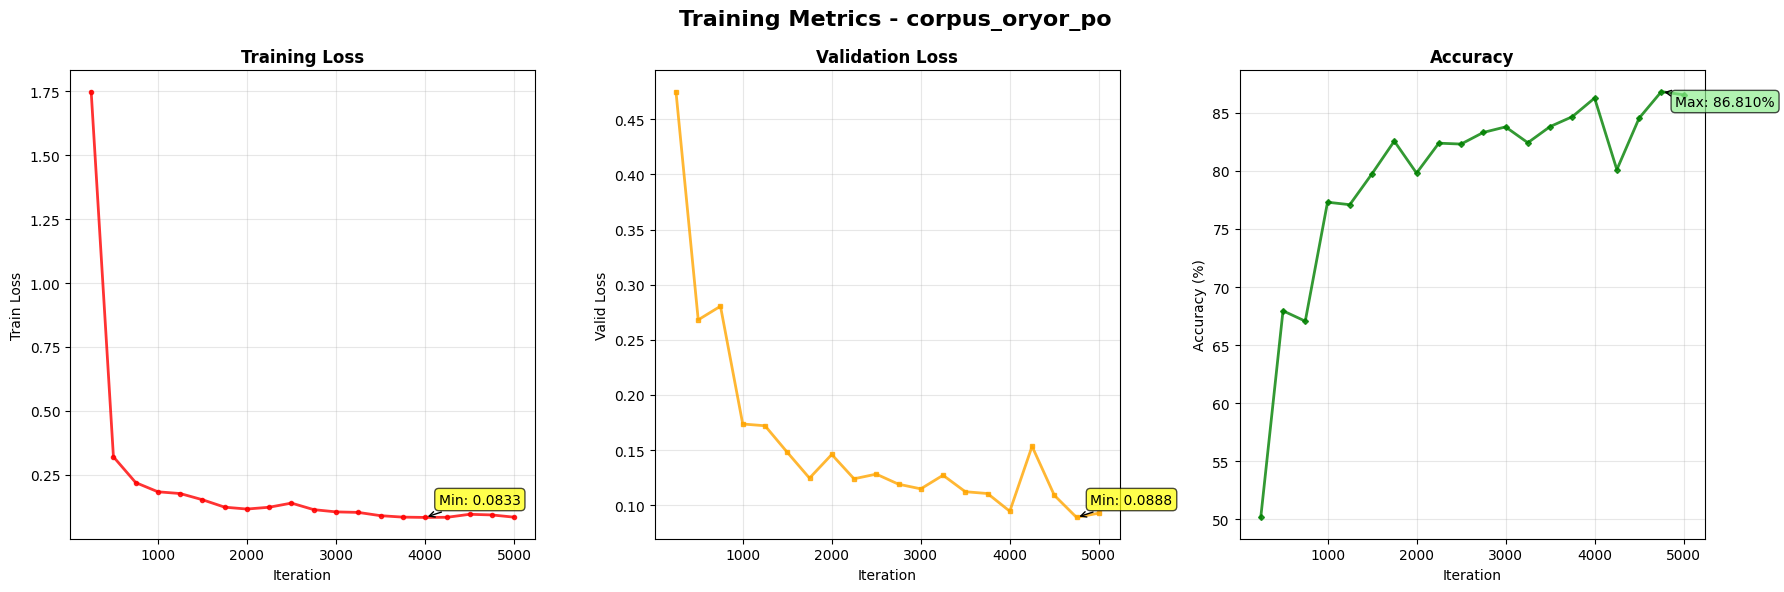

  Data points: 20
  Train Loss: 1.7489 → 0.0844
  Valid Loss: 0.4751 → 0.0927
  Accuracy: 50.174% → 86.532%

🎯 All files processed!


In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def get_short_name(file_name):
    """Convert long filenames to short display names"""
    name_mapping = {
        'out_source_merge_kaggle': 'Kaggle',
        'out_source_merge_kaggle_data_freeze_sequence_config': 'Kaggle_Freeze',
        'out_source_only': 'Source_Only'
    }
    return name_mapping.get(file_name, file_name[:15])

# Plot each file separately - Loss and Accuracy only
files = glob.glob("./*.csv")

if not files:
    print("No CSV files found.")
    exit()

print(f"Found {len(files)} CSV files")

# Process each file individually
for file_path in files:
    try:
        df = pd.read_csv(file_path)
        original_name = Path(file_path).stem
        short_name = get_short_name(original_name)
        
        print(f"\n📊 Processing: {short_name}")
        
        # Use iteration as x-axis if available
        x_data = df['iteration'] if 'iteration' in df.columns else df.index
        x_label = 'Iteration' if 'iteration' in df.columns else 'Step'
        
        # Create figure with 3 subplots for this file
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f'Training Metrics - {short_name}', fontsize=16, fontweight='bold')
        
        # Plot 1: Train Loss
        if 'train_loss' in df.columns:
            axes[0].plot(x_data, df['train_loss'], marker='o', markersize=3, 
                        linewidth=2, color='red', alpha=0.8, label='Train Loss')
            axes[0].set_title('Training Loss', fontweight='bold')
            axes[0].set_xlabel(x_label)
            axes[0].set_ylabel('Train Loss')
            # axes[0].set_yscale('log')  # Comment out for linear scale
            axes[0].grid(True, alpha=0.3)
            
            # Add min value annotation
            min_idx = df['train_loss'].idxmin()
            min_val = df['train_loss'].min()
            axes[0].annotate(f'Min: {min_val:.4f}', 
                            xy=(x_data.iloc[min_idx], min_val),
                            xytext=(10, 10), textcoords='offset points',
                            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
        else:
            axes[0].text(0.5, 0.5, 'No Train Loss Data', ha='center', va='center')
            axes[0].set_title('Training Loss')
        
        # Plot 2: Validation Loss
        if 'valid_loss' in df.columns:
            axes[1].plot(x_data, df['valid_loss'], marker='s', markersize=3, 
                        linewidth=2, color='orange', alpha=0.8, label='Valid Loss')
            axes[1].set_title('Validation Loss', fontweight='bold')
            axes[1].set_xlabel(x_label)
            axes[1].set_ylabel('Valid Loss')
            # axes[1].set_yscale('log')  # Comment out for linear scale
            axes[1].grid(True, alpha=0.3)
            
            # Add min value annotation
            min_idx = df['valid_loss'].idxmin()
            min_val = df['valid_loss'].min()
            axes[1].annotate(f'Min: {min_val:.4f}', 
                            xy=(x_data.iloc[min_idx], min_val),
                            xytext=(10, 10), textcoords='offset points',
                            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
        else:
            axes[1].text(0.5, 0.5, 'No Valid Loss Data', ha='center', va='center')
            axes[1].set_title('Validation Loss')
        
        # Plot 3: Accuracy
        if 'accuracy' in df.columns:
            axes[2].plot(x_data, df['accuracy'], marker='D', markersize=3, 
                        linewidth=2, color='green', alpha=0.8, label='Accuracy')
            axes[2].set_title('Accuracy', fontweight='bold')
            axes[2].set_xlabel(x_label)
            axes[2].set_ylabel('Accuracy (%)')
            axes[2].grid(True, alpha=0.3)
            
            # Add max value annotation
            max_idx = df['accuracy'].idxmax()
            max_val = df['accuracy'].max()
            axes[2].annotate(f'Max: {max_val:.3f}%', 
                            xy=(x_data.iloc[max_idx], max_val),
                            xytext=(10, -10), textcoords='offset points',
                            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7),
                            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
        else:
            axes[2].text(0.5, 0.5, 'No Accuracy Data', ha='center', va='center')
            axes[2].set_title('Accuracy')
        
        plt.tight_layout()
        plt.show()
        
        # Print summary for this file
        print(f"  Data points: {len(df)}")
        if 'train_loss' in df.columns:
            print(f"  Train Loss: {df['train_loss'].iloc[0]:.4f} → {df['train_loss'].iloc[-1]:.4f}")
        if 'valid_loss' in df.columns:
            print(f"  Valid Loss: {df['valid_loss'].iloc[0]:.4f} → {df['valid_loss'].iloc[-1]:.4f}")
        if 'accuracy' in df.columns:
            print(f"  Accuracy: {df['accuracy'].iloc[0]:.3f}% → {df['accuracy'].iloc[-1]:.3f}%")
        
    except Exception as e:
        print(f"✗ Error processing {file_path}: {e}")

print("\n🎯 All files processed!")